## Name : Hyun Shik Chung, Jarvis Dao
## ITSC 4156 – Intro to Machine Learning
## Using LSTM to Predict Bitcoin Prices:


# Introduction

# What is Blockchain
<img src="Images/maxresdefault.jpg" width="700">
<p>By allowing digital information to be distributed but not copied, blockchain technology created the backbone of a new type of internet. Originally devised for the digital currency, Bitcoin, (Buy Bitcoin) the tech community has now found other potential uses for the technology.</p>

# Library

In [1]:
from numpy import *
import numpy as np
import pandas as pd
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras import initializers
from matplotlib import pyplot
from datetime import datetime
from matplotlib import pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Using TensorFlow backend.


<img src="Images/tensorflow-and-keras-an-overview-19-638.jpg" width="700">

# What are different about our project.
<p> 1. Different dataset</p>
<p> 2. LSTM layers </p>
<p> 3. loss function</p>


<p><a href="https://coinmetrics.io/data-downloads/"> DATA for the this project</a></p>

In [2]:
from IPython.display import IFrame
#can get any data set on this website.
IFrame(src='https://coinmetrics.io/data-downloads/', width=900, height=400)

In [3]:
dataset = pd.read_csv('ltcForTrain.csv')

In [4]:
print ("Data shape : ",dataset.shape)
dataset.head(5)

Data shape :  (2744, 17)


date  txVolume(USD)  adjustedTxVolume(USD)  txCount  marketcap(USD)  \
0  2011-10-07            NaN                    NaN      NaN             NaN   
1  2011-10-08            NaN                    NaN      0.0             NaN   
2  2011-10-09            NaN                    NaN      0.0             NaN   
3  2011-10-10            NaN                    NaN      0.0             NaN   
4  2011-10-11            NaN                    NaN      0.0             NaN   

   price(USD)  exchangeVolume(USD)  realizedCap(USD)  generatedCoins  fees  \
0         NaN                  NaN               0.0             NaN   NaN   
1         NaN                  NaN               0.0            50.0   0.0   
2         NaN                  NaN               0.0             NaN   0.0   
3         NaN                  NaN               0.0             NaN   0.0   
4         NaN                  NaN               0.0             NaN   0.0   

   activeAddresses  averageDifficulty  paymentCount  medianTxValue(USD)  \
0              NaN                NaN           NaN                 NaN   
1              1.0           0.000244           0.0                 NaN   
2              0.0                NaN           0.0                 NaN   
3              0.0                NaN           0.0                 NaN   
4              0.0                NaN           0.0                 NaN   

   medianFee  blockSize  blockCount  
0        NaN        NaN         NaN  
1        NaN      215.0         1.0  
2        NaN        0.0         0.0  
3        NaN        0.0         0.0  
4        NaN        0.0         0.0

### There are 569 missing value.

In [5]:
dataset.isnull().sum()

date                       0
txVolume(USD)            569
adjustedTxVolume(USD)    569
txCount                    1
marketcap(USD)           569
price(USD)               569
exchangeVolume(USD)      569
realizedCap(USD)           0
generatedCoins             4
fees                       1
activeAddresses            1
averageDifficulty          4
paymentCount               1
medianTxValue(USD)       569
medianFee                  6
blockSize                  1
blockCount                 1
dtype: int64

In [6]:
dataset.describe()

txVolume(USD)  adjustedTxVolume(USD)        txCount  marketcap(USD)  \
count   2.175000e+03           2.175000e+03    2743.000000    2.175000e+03   
mean    2.194791e+08           6.855580e+07   11355.643821    1.696205e+09   
std     6.439949e+08           1.849340e+08   18226.614984    2.957302e+09   
min     4.484505e+05           3.792622e+05       0.000000    3.801208e+07   
25%     7.930029e+06           3.696041e+06    2972.500000    1.349529e+08   
50%     3.007672e+07           1.086806e+07    4503.000000    1.985032e+08   
75%     1.265453e+08           4.638918e+07   14886.000000    2.394446e+09   
max     1.175670e+10           2.535597e+09  225860.000000    1.953073e+10   

        price(USD)  exchangeVolume(USD)  realizedCap(USD)  generatedCoins  \
count  2175.000000         2.175000e+03      2.744000e+03     2740.000000   
mean     31.892018         2.033175e+08      1.367312e+09    22379.715596   
std      52.805824         4.867494e+08      2.306636e+09    12075.061827   
min       1.150000         0.000000e+00      0.000000e+00       50.000000   
25%       3.355000         1.643170e+06      4.132866e+07    14550.000000   
50%       4.640000         4.154880e+06      2.801397e+08    19800.000000   
75%      44.100000         2.595530e+08      6.537123e+08    29300.000000   
max     359.130000         6.961680e+09      7.313980e+09   484100.000000   

              fees  activeAddresses  averageDifficulty  paymentCount  \
count  2743.000000      2743.000000       2.740000e+03  2.743000e+03   
mean     55.693079     35086.993802       1.420050e+06  2.827418e+04   
std      96.677048     53077.073534       3.024695e+06  7.237327e+04   
min       0.000000         0.000000       2.441406e-04  0.000000e+00   
25%      14.972662      8910.500000       9.575075e+02  6.146500e+03   
50%      25.982844     14007.000000       4.491421e+04  1.099600e+04   
75%      56.499317     42607.000000       2.294769e+05  3.104450e+04   
max    1283.861162    607832.000000       1.187950e+07  1.859479e+06   

       medianTxValue(USD)    medianFee     blockSize   blockCount  
count         2175.000000  2738.000000  2.743000e+03  2743.000000  
mean           173.553970     0.004611  7.024114e+06   588.004375  
std            277.453356     0.018874  9.982084e+06   191.230663  
min              0.001760     0.000000  0.000000e+00     0.000000  
25%             41.363134     0.000224  2.150187e+06   554.000000  
50%             87.967825     0.001000  3.384537e+06   583.000000  
75%            219.318384     0.001000  8.746815e+06   613.000000  
max           4586.266455     0.100000  1.235592e+08  9682.000000

In [7]:
import seaborn as sns
plt.figure(figsize =(10, 10))
corr = dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns.values ,yticklabels=corr.columns.values)

ModuleNotFoundError: No module named 'seaborn'

# Cleaning data
<img src="Images/ml-walkthrough.png" width="700">

## Dealing with missing data
<img src="Images/1__RA3mCS30Pr0vUxbp25Yxw.png" width="500">

<a><img src="https://i.imgflip.com/2z5mqc.jpg" title="made at imgflip.com"/></a>

In [8]:
#drop row 1~570
dataset.drop(dataset.index[:570], inplace=True)
print(dataset.shape)
dataset.isnull().sum()

(2174, 17)


date                     0
txVolume(USD)            0
adjustedTxVolume(USD)    0
txCount                  0
marketcap(USD)           0
price(USD)               0
exchangeVolume(USD)      0
realizedCap(USD)         0
generatedCoins           0
fees                     0
activeAddresses          0
averageDifficulty        0
paymentCount             0
medianTxValue(USD)       0
medianFee                0
blockSize                0
blockCount               0
dtype: int64

### Drop original index and add new index start from 0

In [9]:
dataset= dataset.reset_index(drop=True)

In [10]:
dataset.head(5)

date  txVolume(USD)  adjustedTxVolume(USD)  txCount  marketcap(USD)  \
0  2013-04-29   3.647810e+07           2.111820e+06   9275.0    7.521684e+07   
1  2013-04-30   4.039166e+07           1.969543e+06   9099.0    7.574233e+07   
2  2013-05-01   7.637420e+07           4.691922e+06   8990.0    7.406414e+07   
3  2013-05-02   1.163151e+07           2.501720e+06   8031.0    6.537939e+07   
4  2013-05-03   4.632241e+06           1.964664e+06   6280.0    5.876169e+07   

   price(USD)  exchangeVolume(USD)  realizedCap(USD)  generatedCoins  \
0        4.37                  0.0      2.284118e+07      32500.0000   
1        4.40                  0.0      2.319259e+07      31350.0000   
2        4.29                  0.0      2.458101e+07      31699.9795   
3        3.78                  0.0      2.479254e+07      26150.0000   
4        3.39                  0.0      2.475425e+07      19900.0000   

         fees  activeAddresses  averageDifficulty  paymentCount  \
0  634.409741          18395.0         437.937821        9542.0   
1  792.170373          17810.0         437.937821        9301.0   
2  639.972367          16991.0         471.122764        9326.0   
3  528.803594          15769.0         482.512511        8269.0   
4  375.729091          12956.0         482.512511        6519.0   

   medianTxValue(USD)  medianFee  blockSize  blockCount  
0          181.679890       0.10  4977931.0       650.0  
1          167.863647       0.10  5349282.0       627.0  
2          177.125873       0.10  4463820.0       634.0  
3          155.490420       0.10  4088911.0       523.0  
4          105.126185       0.05  3382172.0       398.0

In [11]:
dataset = dataset.sort_index(axis=1 ,ascending=True)
dataset = dataset.iloc[::-1]
dataset = dataset.sort_index(ascending=True, axis=0)
dataset = dataset.reindex(index = dataset.index[::-1])
dataset = dataset.reset_index()
dataset=dataset.drop('index', axis=1)
dataset.head(5)

activeAddresses  adjustedTxVolume(USD)  averageDifficulty  blockCount  \
0         102834.0           2.727544e+08       1.181510e+07       573.0   
1          99837.0           9.136417e+07       1.187950e+07       557.0   
2          70669.0           8.834103e+07       1.187950e+07       537.0   
3         140714.0           9.404545e+07       1.176827e+07       587.0   
4         162384.0           5.918720e+07       1.141644e+07       611.0   

     blockSize        date  exchangeVolume(USD)       fees  generatedCoins  \
0   65641701.0  2019-04-11         3.461536e+09  17.753439         14325.0   
1   53092124.0  2019-04-10         2.765901e+09  16.292335         13925.0   
2   14846398.0  2019-04-09         2.742631e+09  16.982480         13425.0   
3  123559210.0  2019-04-08         3.295696e+09  18.271835         14675.0   
4   64268502.0  2019-04-07         3.314849e+09  15.560253         15275.0   

   marketcap(USD)  medianFee  medianTxValue(USD)  paymentCount  price(USD)  \
0    5.418036e+09   0.000221           75.837923       75246.0       88.39   
1    5.317491e+09   0.000222           66.125885       76006.0       86.77   
2    5.483492e+09   0.000222           80.628978       46219.0       89.50   
3    5.656034e+09   0.000226           78.122568       50448.0       92.33   
4    5.660144e+09   0.000226           69.606270      138655.0       92.42   

   realizedCap(USD)  txCount  txVolume(USD)  
0      4.632666e+09  26512.0   5.026659e+08  
1      4.621039e+09  25088.0   1.995761e+08  
2      4.615411e+09  23994.0   1.891868e+08  
3      4.607194e+09  25967.0   2.400780e+08  
4      4.602690e+09  24003.0   1.881442e+08

In [12]:
dataset.shape

(2174, 17)

In [13]:
py.init_notebook_mode()
btc_trace = go.Scatter(x=dataset['date'], y=dataset['price(USD)'], name= 'Price')
py.iplot([btc_trace])

### Drop date
<a ><img src="https://i.imgflip.com/2z18v1.jpg" title="made at imgflip.com"/></a>

In [14]:
dataset=dataset.drop('date', axis=1)

In [15]:
dataset.head(5)

activeAddresses  adjustedTxVolume(USD)  averageDifficulty  blockCount  \
0         102834.0           2.727544e+08       1.181510e+07       573.0   
1          99837.0           9.136417e+07       1.187950e+07       557.0   
2          70669.0           8.834103e+07       1.187950e+07       537.0   
3         140714.0           9.404545e+07       1.176827e+07       587.0   
4         162384.0           5.918720e+07       1.141644e+07       611.0   

     blockSize  exchangeVolume(USD)       fees  generatedCoins  \
0   65641701.0         3.461536e+09  17.753439         14325.0   
1   53092124.0         2.765901e+09  16.292335         13925.0   
2   14846398.0         2.742631e+09  16.982480         13425.0   
3  123559210.0         3.295696e+09  18.271835         14675.0   
4   64268502.0         3.314849e+09  15.560253         15275.0   

   marketcap(USD)  medianFee  medianTxValue(USD)  paymentCount  price(USD)  \
0    5.418036e+09   0.000221           75.837923       75246.0       88.39   
1    5.317491e+09   0.000222           66.125885       76006.0       86.77   
2    5.483492e+09   0.000222           80.628978       46219.0       89.50   
3    5.656034e+09   0.000226           78.122568       50448.0       92.33   
4    5.660144e+09   0.000226           69.606270      138655.0       92.42   

   realizedCap(USD)  txCount  txVolume(USD)  
0      4.632666e+09  26512.0   5.026659e+08  
1      4.621039e+09  25088.0   1.995761e+08  
2      4.615411e+09  23994.0   1.891868e+08  
3      4.607194e+09  25967.0   2.400780e+08  
4      4.602690e+09  24003.0   1.881442e+08

In [16]:
print(type(dataset),"Data shape :",dataset.shape)

<class 'pandas.core.frame.DataFrame'> Data shape : (2174, 16)


In [17]:
dataset.shape

(2174, 16)

## Training Set.
<img src="Images/header-testing.jpg" width="700">

In [18]:
len_day = 60
train_set = dataset.iloc[0:len(dataset)-len_day,:]

In [19]:
print(train_set.shape)

(2114, 16)


In [20]:
#save this data for the graph
X_train_4_graph = train_set['price(USD)']


In [21]:
X_train_4_graph= np.array(X_train_4_graph)

## MinMax
<a><img src="https://i.imgflip.com/2z1cro.jpg" width="500" title="made at imgflip.com"/></a>

In [22]:
from sklearn.preprocessing import MinMaxScaler
trainMinMax = MinMaxScaler()
train_set = trainMinMax.fit_transform(train_set)

In [23]:
train_set

array([[1.59425211e-01, 1.07436574e-01, 9.94578482e-01, ...,
        6.31694873e-01, 1.08887965e-01, 4.27191948e-02],
       [1.54436671e-01, 3.58883943e-02, 1.00000000e+00, ...,
        6.30097832e-01, 1.02522496e-01, 1.69380282e-02],
       [1.05886211e-01, 3.46959389e-02, 1.00000000e+00, ...,
        6.29324742e-01, 9.76321707e-02, 1.60543006e-02],
       ...,
       [4.89532722e-03, 3.02233266e-04, 8.35279752e-07, ...,
        3.34344798e-05, 7.15668263e-03, 3.18461602e-04],
       [4.62234739e-03, 3.80901282e-04, 8.35279752e-07, ...,
        1.04332519e-05, 7.83167268e-03, 3.09342103e-04],
       [6.64972194e-03, 5.69653409e-04, 0.00000000e+00, ...,
        0.00000000e+00, 9.22635411e-03, 3.61063488e-04]])

In [24]:
y_train_4G= train_set[:,12]
y_train = y_train_4G.tolist()

In [25]:
#train_set=train_set.drop(train_set[:,12], axis=1)
#trainset =np.delete(train_set, train_set[:,12])
X_train_4Nor=train_set[:,(0,1,2,3,4,5,6,7,8,9,10,11,13,14,15)]
#X_train=train_set
X_train_3D = X_train_4Nor.tolist()

In [26]:
print (len(X_train_3D))

2114


<h1 style =color:red;"> Important change 2D to 3D array</h1>

<p><B>-Samples.</b> One sequence is one sample. A batch is comprised of one or more samples.</p>
<p><B>-Time Steps.</b> One time step is one point of observation in the sample.</p>
<p><B>-Features.</b> One feature is one observation at a time step.</p>
<img src="Images/1_YEBgb0vhEZCCmri7VNI-oA.png" width="700">

In [27]:
#X_train = X_train.tolist
X_train_3D = np.reshape(X_train_3D, (2114, 15, 1))

## Test Set

In [28]:
test_set = dataset.iloc[:60,:]

print (test_set.shape)
print (test_set.head(5))

(60, 16)
   activeAddresses  adjustedTxVolume(USD)  averageDifficulty  blockCount  \
0         102834.0           2.727544e+08       1.181510e+07       573.0   
1          99837.0           9.136417e+07       1.187950e+07       557.0   
2          70669.0           8.834103e+07       1.187950e+07       537.0   
3         140714.0           9.404545e+07       1.176827e+07       587.0   
4         162384.0           5.918720e+07       1.141644e+07       611.0   

     blockSize  exchangeVolume(USD)       fees  generatedCoins  \
0   65641701.0         3.461536e+09  17.753439         14325.0   
1   53092124.0         2.765901e+09  16.292335         13925.0   
2   14846398.0         2.742631e+09  16.982480         13425.0   
3  123559210.0         3.295696e+09  18.271835         14675.0   
4   64268502.0         3.314849e+09  15.560253         15275.0   

   marketcap(USD)  medianFee  medianTxValue(USD)  paymentCount  price(USD)  \
0    5.418036e+09   0.000221           75.837923       7524

In [29]:
y_test_4_graph = test_set['price(USD)']
y_test_4_graph= y_test_4_graph.reset_index(drop=True)

In [30]:
from sklearn.preprocessing import MinMaxScaler
testMinMax = MinMaxScaler()
test_set = testMinMax.fit_transform(test_set)#D

In [31]:
y_test = test_set[:,12]
y_test = y_test.tolist()

In [32]:
X_test_4N=test_set[:,(0,1,2,3,4,5,6,7,8,9,10,11,13,14,15)]
#X_train=train_set

#X_train = X_train.values
#X_train = sc.fit_transform(X_train)
X_test_3D = X_test_4N.tolist()


In [33]:
print (len(X_test_3D))

60


In [34]:
X_test_3D = np.reshape(X_test_3D, (60, 15, 1))

In [35]:
print (y_test)

[0.9206380464749901, 0.8887357227254824, 0.9424970460811344, 0.998227648680583, 1.0, 0.9269397400551398, 0.8546671918077986, 0.8572272548247342, 0.681764474202442, 0.37534462386766454, 0.37672311933832225, 0.37416305632138647, 0.3861756597085466, 0.38460023631350926, 0.4052776683733754, 0.3499409216226861, 0.35191020086648295, 0.3674675068924773, 0.385978731784167, 0.3574241827491138, 0.3477747144545096, 0.3786923985821189, 0.37495076801890503, 0.36589208349743996, 0.38676644348168576, 0.3985821189444665, 0.3416699487987398, 0.2934226073257187, 0.2800315084679008, 0.30405671524222133, 0.27116975187081516, 0.30622292241039784, 0.32414336352894835, 0.28278849940921624, 0.31114612051988977, 0.27963765261914153, 0.22410397794407255, 0.09610082709728252, 0.1317447814100039, 0.14533280819220173, 0.11500590783773135, 0.09058684521465143, 0.07837731390311142, 0.07601417881055539, 0.08940527766837336, 0.05789680976762501, 0.19771563607719567, 0.15813312327688067, 0.14749901536037813, 0.20086648

### Loss function
#### Mean Squared Error formula
<img src="Images/Lstm.png" width="500">

<h3>LSTM is made up of three gates:</h3>

<p>Forget Gate (f_t) - Controls if/when the context is forgotten. (MC) </p>
<p>Input Gate (i_t) - Controls if/when a value should be remembered by the context. (M+/MS) </p>
<p>Output Gate (o_t) - Controls if/when the remembered value is allowed to pass from the unit. (RM) </p>

# Sigmoid function.
<img src="Images/main-qimg-07066668c05a556f1ff25040414a32b7.png" width="500">

# Loss functions
<p>Mean absolute error</p>
<p>mean absolute percentage error</p>
<p>Mean squared logarithmic error</p>
<p>Squared_hinge</p>
<p>Hinge</p>
<p>categorical hinge</p>
<p>logcosh</p>
<p>Categorical crossentropy,Spare categorical crossentorpy.</p>
<p>.....etc</p>

#### Mean Squared Error formula
<img src="Images/Mean-Squared-Error-formula-used-to-evaluate-the-user-model.png" width="700">

## Gradient descent optimization algorithms
<p>Stochastic gradient descent optimizer</p>
<p>RMSProp optimizer</p>
<p>Adagrad optimizer</p>
<p>Adadelta opimizer</p>
<p>Adamax, and Nadam</p>
<h3> Adaptive Moment Estimation (Adam) </h3>
<img src="Images/Figure-A39-Heavy-Ball-with-Friction-where-the-ball-with-mass-overshoots-the-local.png" width="600">

# Two layer with Sigmoid and RELU activation fuction

In [36]:
sigRulu = Sequential()

#Adding the input layer and the LSTM layer
sigRulu.add(LSTM(units = 50, activation = 'sigmoid',return_sequences=True, input_shape = (None, 1)))
#regressor.add(LSTM(units=20,return_sequences=True))
#Adding the output layer
sigRulu.add(LSTM(units = 100, activation= 'relu', return_sequences=False))
sigRulu.add(Dropout(rate=.2))
sigRulu.add(Dense(units = 1))
#Compiling the Recurrent Neural Network
sigRulu.compile(optimizer = 'adam', loss = 'mean_squared_error')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<a ><img src="https://i.imgflip.com/2z5n23.jpg" title="made at imgflip.com"/></a>

In [37]:
historyTwo= sigRulu.fit(X_train_3D, y_train, batch_size = 50, epochs = 500)

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
2114/2114 [==============================] - 5s 2ms/step - loss: 0.0273
Epoch 2/500
2114/2114 [==============================] - 4s 2ms/step - loss: 0.0225
Epoch 3/500
2114/2114 [==============================] - 3s 1ms/step - loss: 0.0221
Epoch 4/500
2114/2114 [==============================] - 3s 1ms/step - loss: 0.0215A: 0s - loss: 0.02
Epoch 5/500
2114/2114 [==============================] - 3s 1ms/step - loss: 0.0213
Epoch 6/500
2114/2114 [==============================] - 2s 1ms/step - loss: 0.0203
Epoch 7/500
2114/2114 [==============================] - 3s 1ms/step - loss: 0.0191
Epoch 8/500
2114/2114 [==============================] - 3s 1ms/step - loss: 0.0125
Epoch 9/500
2114/2114 [==============================] - 2s 1ms/step - loss: 0.0103
Epoch 10/500
2114/2114 [==============================] - 3s 1ms/step - loss: 0.0072
Epoch 11/500
2114/2114 [==============================] - 3s 2ms/step - loss: 0.0071A: 0s - l

2114/2114 [==============================] - 1s 668us/step - loss: 0.0011 0s - loss: 0
Epoch 93/500
2114/2114 [==============================] - 1s 598us/step - loss: 0.0012 0s -
Epoch 94/500
2114/2114 [==============================] - 1s 640us/step - loss: 0.0013
Epoch 95/500
2114/2114 [==============================] - 1s 656us/step - loss: 0.0013 0s - l
Epoch 96/500
2114/2114 [==============================] - 2s 930us/step - loss: 0.0014
Epoch 97/500
2114/2114 [==============================] - 2s 1ms/step - loss: 0.0013
Epoch 98/500
2114/2114 [==============================] - 2s 726us/step - loss: 0.0014
Epoch 99/500
2114/2114 [==============================] - 2s 855us/step - loss: 0.0014
Epoch 100/500
2114/2114 [==============================] - 2s 835us/step - loss: 0.0013
Epoch 101/500
2114/2114 [==============================] - 2s 865us/step - loss: 0.0012
Epoch 102/500
2114/2114 [==============================] - 2s 860us/step - loss: 0.0014
Epoch 103/500
2114/2114 [=====

2114/2114 [==============================] - 1s 608us/step - loss: 9.6376e-04
Epoch 184/500
2114/2114 [==============================] - 1s 599us/step - loss: 0.0012
Epoch 185/500
2114/2114 [==============================] - 2s 892us/step - loss: 0.0010 0s - loss:
Epoch 186/500
2114/2114 [==============================] - 2s 740us/step - loss: 7.7623e-04
Epoch 187/500
2114/2114 [==============================] - 2s 747us/step - loss: 6.5012e-04
Epoch 188/500
2114/2114 [==============================] - 2s 750us/step - loss: 9.1309e-04
Epoch 189/500
2114/2114 [==============================] - 2s 778us/step - loss: 0.0011
Epoch 190/500
2114/2114 [==============================] - 2s 744us/step - loss: 8.8935e-04
Epoch 191/500
2114/2114 [==============================] - 2s 774us/step - loss: 7.4841e-04
Epoch 192/500
2114/2114 [==============================] - 2s 731us/step - loss: 8.2450e-04
Epoch 193/500
2114/2114 [==============================] - 2s 756us/step - loss: 7.6809e-04 
Ep

2114/2114 [==============================] - 2s 908us/step - loss: 7.1964e-04
Epoch 273/500
2114/2114 [==============================] - 2s 1ms/step - loss: 7.1027e-04
Epoch 274/500
2114/2114 [==============================] - 2s 881us/step - loss: 5.8926e-04
Epoch 275/500
2114/2114 [==============================] - 3s 1ms/step - loss: 6.7295e-04
Epoch 276/500
2114/2114 [==============================] - 2s 945us/step - loss: 7.5125e-04
Epoch 277/500
2114/2114 [==============================] - 1s 631us/step - loss: 6.1076e-04 0s - lo
Epoch 278/500
2114/2114 [==============================] - 1s 610us/step - loss: 7.5038e-04
Epoch 279/500
2114/2114 [==============================] - 2s 837us/step - loss: 6.2206e-04 0s - loss: 6.331
Epoch 280/500
2114/2114 [==============================] - 1s 624us/step - loss: 5.3866e-04
Epoch 281/500
2114/2114 [==============================] - 1s 618us/step - loss: 5.0907e-04
Epoch 282/500
2114/2114 [==============================] - 1s 638us/step 

2114/2114 [==============================] - 1s 600us/step - loss: 5.9615e-04
Epoch 360/500
2114/2114 [==============================] - 1s 640us/step - loss: 7.3339e-04
Epoch 361/500
2114/2114 [==============================] - 1s 621us/step - loss: 8.0141e-04 0s 
Epoch 362/500
2114/2114 [==============================] - 1s 617us/step - loss: 7.3997e-04
Epoch 363/500
2114/2114 [==============================] - 1s 589us/step - loss: 7.1684e-04
Epoch 364/500
2114/2114 [==============================] - 1s 598us/step - loss: 8.1935e-04
Epoch 365/500
2114/2114 [==============================] - 1s 593us/step - loss: 6.8246e-04
Epoch 366/500
2114/2114 [==============================] - 2s 781us/step - loss: 5.4010e-04
Epoch 367/500
2114/2114 [==============================] - 1s 610us/step - loss: 6.4050e-04
Epoch 368/500
2114/2114 [==============================] - 1s 601us/step - loss: 6.6346e-04
Epoch 369/500
2114/2114 [==============================] - 1s 605us/step - loss: 6.2649e-0

2114/2114 [==============================] - 1s 688us/step - loss: 7.0646e-04
Epoch 446/500
2114/2114 [==============================] - 1s 629us/step - loss: 5.4308e-04
Epoch 447/500
2114/2114 [==============================] - 1s 641us/step - loss: 6.2576e-04
Epoch 448/500
2114/2114 [==============================] - 1s 648us/step - loss: 5.5083e-04 0s - loss: 5.50
Epoch 449/500
2114/2114 [==============================] - 1s 632us/step - loss: 5.8677e-04
Epoch 450/500
2114/2114 [==============================] - 1s 656us/step - loss: 5.9713e-04
Epoch 451/500
2114/2114 [==============================] - 1s 685us/step - loss: 5.4976e-04
Epoch 452/500
2114/2114 [==============================] - 2s 712us/step - loss: 4.9254e-04
Epoch 453/500
2114/2114 [==============================] - 1s 702us/step - loss: 5.4101e-04
Epoch 454/500
2114/2114 [==============================] - 2s 804us/step - loss: 4.9872e-04
Epoch 455/500
2114/2114 [==============================] - 2s 781us/step - los

# Loss function for RELU

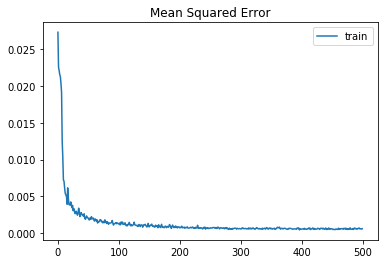

In [38]:
pyplot.title('Mean Squared Error')
pyplot.plot(historyTwo.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [39]:
all_priceRulu = sigRulu.predict(X_train_3D)

In [40]:
All_inverseRulu_T =np.concatenate((X_train_4Nor, all_priceRulu), axis=1)

In [41]:
All_inverseRulu_T = pd.DataFrame(All_inverseRulu_T,columns=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
All_inverseRulu_T.tail(5)

0         1             2         3         4    5         6  \
2109  0.008459  0.000521  3.606515e-06  0.489011  0.014703  0.0  0.101531   
2110  0.009717  0.000594  1.832925e-06  0.472527  0.027416  0.0  0.193424   
2111  0.004895  0.000302  8.352798e-07  0.357143  0.010709  0.0  0.110597   
2112  0.004622  0.000381  8.352798e-07  0.452381  0.010099  0.0  0.109903   
2113  0.006650  0.000570  0.000000e+00  0.410256  0.016235  0.0  0.126421   

             7         8         9        10        11        12        13  \
2109  0.742215  0.000944  0.000000  0.022339  0.007341  0.000060  0.012552   
2110  0.726644  0.000992  0.006305  0.027228  0.008202  0.000047  0.014367   
2111  0.617647  0.000774  0.100000  0.026916  0.002917  0.000033  0.007157   
2112  0.707612  0.000745  0.100000  0.024805  0.003172  0.000010  0.007832   
2113  0.667820  0.001006  0.000000  0.026426  0.003908  0.000000  0.009226   

            14        15  
2109  0.000348  0.005671  
2110  0.000402  0.006868  
2111  0.000318  0.008878  
2112  0.000309  0.009508  
2113  0.000361  0.005477

In [42]:
columnsTitles = ['0','1','2','3','4','5','6','7','8','9','10','11','15','13','14','12']
All_inverseRulu_T=All_inverseRulu_T.reindex(columns=columnsTitles)
All_inverseRulu_T =All_inverseRulu_T[::-1]

All_inverseRulu_T.head(5)

0         1             2         3         4    5         6  \
2113  0.006650  0.000570  0.000000e+00  0.410256  0.016235  0.0  0.126421   
2112  0.004622  0.000381  8.352798e-07  0.452381  0.010099  0.0  0.109903   
2111  0.004895  0.000302  8.352798e-07  0.357143  0.010709  0.0  0.110597   
2110  0.009717  0.000594  1.832925e-06  0.472527  0.027416  0.0  0.193424   
2109  0.008459  0.000521  3.606515e-06  0.489011  0.014703  0.0  0.101531   

             7         8         9        10        11        15        13  \
2113  0.667820  0.001006  0.000000  0.026426  0.003908  0.005477  0.009226   
2112  0.707612  0.000745  0.100000  0.024805  0.003172  0.009508  0.007832   
2111  0.617647  0.000774  0.100000  0.026916  0.002917  0.008878  0.007157   
2110  0.726644  0.000992  0.006305  0.027228  0.008202  0.006868  0.014367   
2109  0.742215  0.000944  0.000000  0.022339  0.007341  0.005671  0.012552   

            14        12  
2113  0.000361  0.000000  
2112  0.000309  0.000010  
2111  0.000318  0.000033  
2110  0.000402  0.000047  
2109  0.000348  0.000060

In [43]:
All_inverseRulu_T = np.array(All_inverseRulu_T)

In [44]:
All_inverseRulu_T = trainMinMax.inverse_transform(All_inverseRulu_T)

In [45]:
All_inverseRulu_T

array([[1.10500000e+04, 1.82345776e+06, 7.98626858e+02, ...,
        1.01005364e+08, 2.23377243e+03, 4.48450527e+05],
       [9.83200000e+03, 1.34492997e+06, 8.08548894e+02, ...,
        9.08518825e+07, 2.22220199e+03, 5.71106414e+05],
       [9.99600000e+03, 1.14548939e+06, 8.08548894e+02, ...,
        8.59378578e+07, 2.22424209e+03, 8.41514530e+05],
       ...,
       [7.06690000e+04, 8.83410322e+07, 1.18794958e+07, ...,
        7.44612429e+08, 5.74445943e+03, 7.39894557e+09],
       [9.98370000e+04, 9.13641667e+07, 1.18794958e+07, ...,
        7.80214701e+08, 5.94215548e+03, 7.40803421e+09],
       [1.02834000e+05, 2.72754401e+08, 1.18150952e+07, ...,
        8.26556232e+08, 1.17095829e+04, 7.42680941e+09]])

In [46]:
All_inverseRulu_T=All_inverseRulu_T[:,12]
All_inverseRulu_T = All_inverseRulu_T[::-1]

# Two layer with Two sigmoid fuction.

In [47]:
regressor = Sequential()

#Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 50, activation = 'sigmoid',return_sequences=True, input_shape = (None, 1)))
#regressor.add(LSTM(units=20,return_sequences=True))
#Adding the output layer
regressor.add(LSTM(units = 100, return_sequences=False))
regressor.add(Dropout(rate=.2))
regressor.add(Dense(units = 1))
#Compiling the Recurrent Neural Network
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


# Batch size 50 and epoch 500

In [48]:
#Fitting the Recurrent Neural Network [epoches is a kindoff number of iteration]

history= regressor.fit(X_train_3D, y_train, batch_size = 50, epochs = 500)

Epoch 1/500
2114/2114 [==============================] - 5s 2ms/step - loss: 0.0332
Epoch 2/500
2114/2114 [==============================] - 3s 1ms/step - loss: 0.0240
Epoch 3/500
2114/2114 [==============================] - 5s 2ms/step - loss: 0.0233
Epoch 4/500
2114/2114 [==============================] - 3s 1ms/step - loss: 0.0210
Epoch 5/500
2114/2114 [==============================] - 3s 2ms/step - loss: 0.0188
Epoch 6/500
2114/2114 [==============================] - 3s 2ms/step - loss: 0.0139
Epoch 7/500
2114/2114 [==============================] - 4s 2ms/step - loss: 0.0125
Epoch 8/500
2114/2114 [==============================] - 3s 1ms/step - loss: 0.0059
Epoch 9/500
2114/2114 [==============================] - 3s 1ms/step - loss: 0.0047
Epoch 10/500
2114/2114 [==============================] - 3s 1ms/step - loss: 0.0044
Epoch 11/500
2114/2114 [==============================] - 3s 2ms/step - loss: 0.0038
Epoch 12/500
2114/2114 [==============================] - 3s 2ms/step - lo

2114/2114 [==============================] - 4s 2ms/step - loss: 8.8116e-04
Epoch 96/500
2114/2114 [==============================] - 4s 2ms/step - loss: 8.0560e-04
Epoch 97/500
2114/2114 [==============================] - ETA: 0s - loss: 6.4673e-0 - 3s 2ms/step - loss: 6.4582e-04
Epoch 98/500
2114/2114 [==============================] - 4s 2ms/step - loss: 7.3751e-04
Epoch 99/500
2114/2114 [==============================] - 3s 1ms/step - loss: 8.0740e-04
Epoch 100/500
2114/2114 [==============================] - 3s 1ms/step - loss: 7.2674e-04
Epoch 101/500
2114/2114 [==============================] - 3s 2ms/step - loss: 7.7812e-04
Epoch 102/500
2114/2114 [==============================] - 4s 2ms/step - loss: 9.3670e-04
Epoch 103/500
2114/2114 [==============================] - 3s 2ms/step - loss: 0.0010
Epoch 104/500
2114/2114 [==============================] - 3s 2ms/step - loss: 8.6903e-04
Epoch 105/500
2114/2114 [==============================] - 4s 2ms/step - loss: 8.2241e-04
Epoc

2114/2114 [==============================] - 3s 1ms/step - loss: 4.6225e-04
Epoch 185/500
2114/2114 [==============================] - 4s 2ms/step - loss: 3.7628e-04
Epoch 186/500
2114/2114 [==============================] - 3s 1ms/step - loss: 3.0614e-04
Epoch 187/500
2114/2114 [==============================] - 3s 1ms/step - loss: 3.1166e-04
Epoch 188/500
2114/2114 [==============================] - 3s 2ms/step - loss: 2.9110e-04
Epoch 189/500
2114/2114 [==============================] - 4s 2ms/step - loss: 2.4782e-04
Epoch 190/500
2114/2114 [==============================] - 5s 2ms/step - loss: 3.3357e-04
Epoch 191/500
2114/2114 [==============================] - 5s 2ms/step - loss: 3.1801e-04
Epoch 192/500
2114/2114 [==============================] - 5s 2ms/step - loss: 3.2420e-04
Epoch 193/500
2114/2114 [==============================] - 7s 3ms/step - loss: 2.7116e-04
Epoch 194/500
2114/2114 [==============================] - 7s 3ms/step - loss: 2.8263e-04
Epoch 195/500
2114/2114 

2114/2114 [==============================] - 4s 2ms/step - loss: 3.4515e-04
Epoch 275/500
2114/2114 [==============================] - 3s 2ms/step - loss: 2.5165e-04
Epoch 276/500
2114/2114 [==============================] - 4s 2ms/step - loss: 2.5798e-04
Epoch 277/500
2114/2114 [==============================] - 4s 2ms/step - loss: 2.3588e-04
Epoch 278/500
2114/2114 [==============================] - 4s 2ms/step - loss: 2.4743e-04
Epoch 279/500
2114/2114 [==============================] - 2s 1ms/step - loss: 2.9206e-04
Epoch 280/500
2114/2114 [==============================] - 4s 2ms/step - loss: 3.0801e-04
Epoch 281/500
2114/2114 [==============================] - 4s 2ms/step - loss: 2.1022e-04
Epoch 282/500
2114/2114 [==============================] - 2s 1ms/step - loss: 2.8033e-04
Epoch 283/500
2114/2114 [==============================] - 3s 1ms/step - loss: 3.8378e-04
Epoch 284/500
2114/2114 [==============================] - 2s 1ms/step - loss: 2.6908e-04
Epoch 285/500
2114/2114 

2114/2114 [==============================] - 2s 1ms/step - loss: 2.5419e-04
Epoch 364/500
2114/2114 [==============================] - 2s 950us/step - loss: 2.2892e-04
Epoch 365/500
2114/2114 [==============================] - 2s 884us/step - loss: 2.5948e-04
Epoch 366/500
2114/2114 [==============================] - 3s 1ms/step - loss: 2.0719e-04
Epoch 367/500
2114/2114 [==============================] - 2s 966us/step - loss: 2.0663e-04
Epoch 368/500
2114/2114 [==============================] - 2s 1ms/step - loss: 3.5254e-04
Epoch 369/500
2114/2114 [==============================] - 2s 923us/step - loss: 2.4706e-04
Epoch 370/500
2114/2114 [==============================] - 2s 938us/step - loss: 2.6146e-04
Epoch 371/500
2114/2114 [==============================] - 2s 969us/step - loss: 2.2943e-04
Epoch 372/500
2114/2114 [==============================] - 2s 982us/step - loss: 2.3185e-04
Epoch 373/500
2114/2114 [==============================] - 2s 1ms/step - loss: 2.0513e-04
Epoch 374/

2114/2114 [==============================] - 3s 1ms/step - loss: 1.5808e-04
Epoch 454/500
2114/2114 [==============================] - 3s 1ms/step - loss: 2.1441e-04
Epoch 455/500
2114/2114 [==============================] - 3s 1ms/step - loss: 2.4371e-04
Epoch 456/500
2114/2114 [==============================] - 3s 1ms/step - loss: 2.0417e-04
Epoch 457/500
2114/2114 [==============================] - 3s 1ms/step - loss: 1.9976e-04
Epoch 458/500
2114/2114 [==============================] - 3s 1ms/step - loss: 2.0031e-04
Epoch 459/500
2114/2114 [==============================] - 3s 1ms/step - loss: 1.7223e-04
Epoch 460/500
2114/2114 [==============================] - 3s 2ms/step - loss: 1.4881e-04
Epoch 461/500
2114/2114 [==============================] - 3s 1ms/step - loss: 1.3665e-04
Epoch 462/500
2114/2114 [==============================] - 3s 1ms/step - loss: 1.4583e-04
Epoch 463/500
2114/2114 [==============================] - 3s 1ms/step - loss: 1.3881e-04
Epoch 464/500
2114/2114 

In [49]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, None, 50)          10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________________________


# Loss function for two sigmod

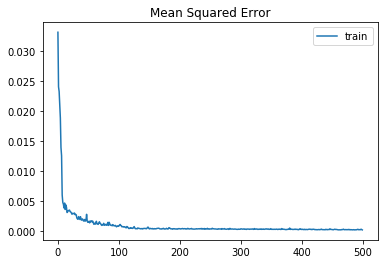

In [50]:
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [51]:
all_price = regressor.predict(X_train_3D)

In [52]:
#nomal X_train + pred
All_inverse_T =np.concatenate((X_train_4Nor, all_price), axis=1)

# Denormalization

<a><img src="https://i.imgflip.com/2zccyx.jpg" title="made at imgflip.com"/></a>

In [53]:
All_inverse_T = pd.DataFrame(All_inverse_T,columns=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
All_inverse_T.tail(5)

0         1             2         3         4    5         6  \
2109  0.008459  0.000521  3.606515e-06  0.489011  0.014703  0.0  0.101531   
2110  0.009717  0.000594  1.832925e-06  0.472527  0.027416  0.0  0.193424   
2111  0.004895  0.000302  8.352798e-07  0.357143  0.010709  0.0  0.110597   
2112  0.004622  0.000381  8.352798e-07  0.452381  0.010099  0.0  0.109903   
2113  0.006650  0.000570  0.000000e+00  0.410256  0.016235  0.0  0.126421   

             7         8         9        10        11        12        13  \
2109  0.742215  0.000944  0.000000  0.022339  0.007341  0.000060  0.012552   
2110  0.726644  0.000992  0.006305  0.027228  0.008202  0.000047  0.014367   
2111  0.617647  0.000774  0.100000  0.026916  0.002917  0.000033  0.007157   
2112  0.707612  0.000745  0.100000  0.024805  0.003172  0.000010  0.007832   
2113  0.667820  0.001006  0.000000  0.026426  0.003908  0.000000  0.009226   

            14        15  
2109  0.000348  0.004059  
2110  0.000402  0.007565  
2111  0.000318  0.006417  
2112  0.000309  0.007682  
2113  0.000361  0.003041

In [54]:
columnsTitles = ['0','1','2','3','4','5','6','7','8','9','10','11','15','13','14','12']
All_inverse_T=All_inverse_T.reindex(columns=columnsTitles)
All_inverse_T =All_inverse_T[::-1]

All_inverse_T.head(5)

0         1             2         3         4    5         6  \
2113  0.006650  0.000570  0.000000e+00  0.410256  0.016235  0.0  0.126421   
2112  0.004622  0.000381  8.352798e-07  0.452381  0.010099  0.0  0.109903   
2111  0.004895  0.000302  8.352798e-07  0.357143  0.010709  0.0  0.110597   
2110  0.009717  0.000594  1.832925e-06  0.472527  0.027416  0.0  0.193424   
2109  0.008459  0.000521  3.606515e-06  0.489011  0.014703  0.0  0.101531   

             7         8         9        10        11        15        13  \
2113  0.667820  0.001006  0.000000  0.026426  0.003908  0.003041  0.009226   
2112  0.707612  0.000745  0.100000  0.024805  0.003172  0.007682  0.007832   
2111  0.617647  0.000774  0.100000  0.026916  0.002917  0.006417  0.007157   
2110  0.726644  0.000992  0.006305  0.027228  0.008202  0.007565  0.014367   
2109  0.742215  0.000944  0.000000  0.022339  0.007341  0.004059  0.012552   

            14        12  
2113  0.000361  0.000000  
2112  0.000309  0.000010  
2111  0.000318  0.000033  
2110  0.000402  0.000047  
2109  0.000348  0.000060

In [55]:
All_inverse_T = np.array(All_inverse_T)

In [56]:
All_inverse_T = trainMinMax.inverse_transform(All_inverse_T)

In [57]:
All_inverse_T

array([[1.10500000e+04, 1.82345776e+06, 7.98626858e+02, ...,
        1.01005364e+08, 2.23377243e+03, 4.48450527e+05],
       [9.83200000e+03, 1.34492997e+06, 8.08548894e+02, ...,
        9.08518825e+07, 2.22220199e+03, 5.71106414e+05],
       [9.99600000e+03, 1.14548939e+06, 8.08548894e+02, ...,
        8.59378578e+07, 2.22424209e+03, 8.41514530e+05],
       ...,
       [7.06690000e+04, 8.83410322e+07, 1.18794958e+07, ...,
        7.44612429e+08, 5.74445943e+03, 7.39894557e+09],
       [9.98370000e+04, 9.13641667e+07, 1.18794958e+07, ...,
        7.80214701e+08, 5.94215548e+03, 7.40803421e+09],
       [1.02834000e+05, 2.72754401e+08, 1.18150952e+07, ...,
        8.26556232e+08, 1.17095829e+04, 7.42680941e+09]])

In [58]:
predicted_btc_price = regressor.predict(X_test_3D)

predicted_btc_price2 = model.predict(X_test_3D)

In [59]:
inverse_T =np.concatenate((X_test_4N, predicted_btc_price), axis=1)

In [60]:
inverse_T = pd.DataFrame(inverse_T,columns=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
columnsTitles = ['0','1','2','3','4','5','6','7','8','9','10','11','15','13','14','12']
inverse_T=inverse_T.reindex(columns=columnsTitles)

inverse_T.head(5)

0         1         2         3         4         5         6  \
0  0.427382  1.000000  0.986381  0.382353  0.483978  0.473046  0.172909   
1  0.398563  0.262565  1.000000  0.225490  0.372166  0.339485  0.120980   
2  0.118091  0.250274  1.000000  0.029412  0.031412  0.335017  0.145508   
3  0.791627  0.273466  0.976479  0.519608  1.000000  0.441205  0.191333   
4  1.000000  0.131751  0.902079  0.754902  0.471743  0.444882  0.094961   

          7         8         9        10        11        15        13  \
0  0.382353  0.922934  0.910517  0.385649  0.355475  1.090726  0.368126   
1  0.225490  0.890929  0.931034  0.277162  0.363200  0.946243  0.300381   
2  0.029412  0.943769  0.931034  0.439168  0.060428  0.797729  0.248335   
3  0.519608  0.998692  1.000000  0.411170  0.103414  1.022931  0.342198   
4  0.754902  1.000000  1.000000  0.316039  1.000000  0.907855  0.248763   

         14        12  
0  1.000000  1.000000  
1  0.330390  0.931427  
2  0.307437  0.898232  
3  0.419870  0.849767  
4  0.305134  0.823203

In [61]:
#change to real number
inverse_T = testMinMax.inverse_transform(inverse_T)

dataset.head(10)

activeAddresses  adjustedTxVolume(USD)  averageDifficulty  blockCount  \
0         102834.0           2.727544e+08       1.181510e+07       573.0   
1          99837.0           9.136417e+07       1.187950e+07       557.0   
2          70669.0           8.834103e+07       1.187950e+07       537.0   
3         140714.0           9.404545e+07       1.176827e+07       587.0   
4         162384.0           5.918720e+07       1.141644e+07       611.0   
5          73882.0           7.553726e+07       1.141644e+07       599.0   
6          77797.0           8.994418e+07       1.141644e+07       580.0   
7          83650.0           1.552426e+08       1.079240e+07       588.0   
8         105006.0           1.763392e+08       1.068695e+07       608.0   
9          94751.0           1.680972e+08       1.068695e+07       630.0   

     blockSize  exchangeVolume(USD)       fees  generatedCoins  \
0   65641701.0         3.461536e+09  17.753439         14325.0   
1   53092124.0         2.765901e+09  16.292335         13925.0   
2   14846398.0         2.742631e+09  16.982480         13425.0   
3  123559210.0         3.295696e+09  18.271835         14675.0   
4   64268502.0         3.314849e+09  15.560253         15275.0   
5   14884957.0         3.857951e+09  15.615545         14975.0   
6   16160708.0         3.512862e+09  17.666264         14500.0   
7   18505439.0         4.195623e+09  19.729360         14700.0   
8   24619430.0         6.206102e+09  28.658120         15200.0   
9   24165146.0         4.161363e+09  30.859781         15750.0   

   marketcap(USD)  medianFee  medianTxValue(USD)  paymentCount  price(USD)  \
0    5.418036e+09   0.000221           75.837923       75246.0       88.39   
1    5.317491e+09   0.000222           66.125885       76006.0       86.77   
2    5.483492e+09   0.000222           80.628978       46219.0       89.50   
3    5.656034e+09   0.000226           78.122568       50448.0       92.33   
4    5.660144e+09   0.000226           69.606270      138655.0       92.42   
5    5.431633e+09   0.000212           78.872088       49683.0       88.71   
6    5.205337e+09   0.000192           77.999367       51084.0       85.04   
7    5.212237e+09   0.000211           89.428500       53736.0       85.17   
8    4.665896e+09   0.000224          130.835753       62947.0       76.26   
9    3.713027e+09   0.000226           60.685189       59689.0       60.70   

   realizedCap(USD)  txCount  txVolume(USD)  
0      4.632666e+09  26512.0   5.026659e+08  
1      4.621039e+09  25088.0   1.995761e+08  
2      4.615411e+09  23994.0   1.891868e+08  
3      4.607194e+09  25967.0   2.400780e+08  
4      4.602690e+09  24003.0   1.881442e+08  
5      4.598286e+09  26033.0   2.290478e+08  
6      4.587935e+09  26768.0   2.563719e+08  
7      4.578644e+09  29731.0   3.004893e+08  
8      4.572197e+09  39794.0   4.116363e+08  
9      4.544131e+09  35034.0   4.544110e+08

In [62]:
inverse_T =pd.DataFrame(inverse_T)

In [63]:
print(inverse_T.shape)
inverse_T.head(5)

(60, 16)


0             1             2      3            4             5   \
0  102834.0  2.727544e+08  1.181510e+07  573.0   65641701.0  3.461536e+09   
1   99837.0  9.136417e+07  1.187950e+07  557.0   53092124.0  2.765901e+09   
2   70669.0  8.834103e+07  1.187950e+07  537.0   14846398.0  2.742631e+09   
3  140714.0  9.404545e+07  1.176827e+07  587.0  123559210.0  3.295696e+09   
4  162384.0  5.918720e+07  1.141644e+07  611.0   64268502.0  3.314849e+09   

          6        7             8         9          10        11         12  \
0  17.753439  14325.0  5.418036e+09  0.000221  75.837923   75246.0  97.027085   
1  16.292335  13925.0  5.317491e+09  0.000222  66.125885   76006.0  89.690198   
2  16.982480  13425.0  5.483492e+09  0.000222  80.628978   46219.0  82.148698   
3  18.271835  14675.0  5.656034e+09  0.000226  78.122568   50448.0  93.584459   
4  15.560253  15275.0  5.660144e+09  0.000226  69.606270  138655.0  87.740894   

             13            14            15  
0  4.525531e+09  39794.000000  5.026659e+08  
1  4.514045e+09  25718.805539  4.716270e+08  
2  4.505220e+09  25236.335600  4.566019e+08  
3  4.521135e+09  27599.674751  4.346648e+08  
4  4.505293e+09  25187.918283  4.226409e+08

In [64]:
inverse_T = np.array(inverse_T)
type(inverse_T)

numpy.ndarray

In [65]:
inverse_T= inverse_T[:,12]

In [66]:
all_pred=All_inverse_T[:,12]
all_pred = all_pred[::-1]

### MSE

In [67]:
#score for reulu
from sklearn.metrics import mean_squared_error
mean_squared_error(X_train_4_graph,All_inverseRulu_T)

20.027729697685217

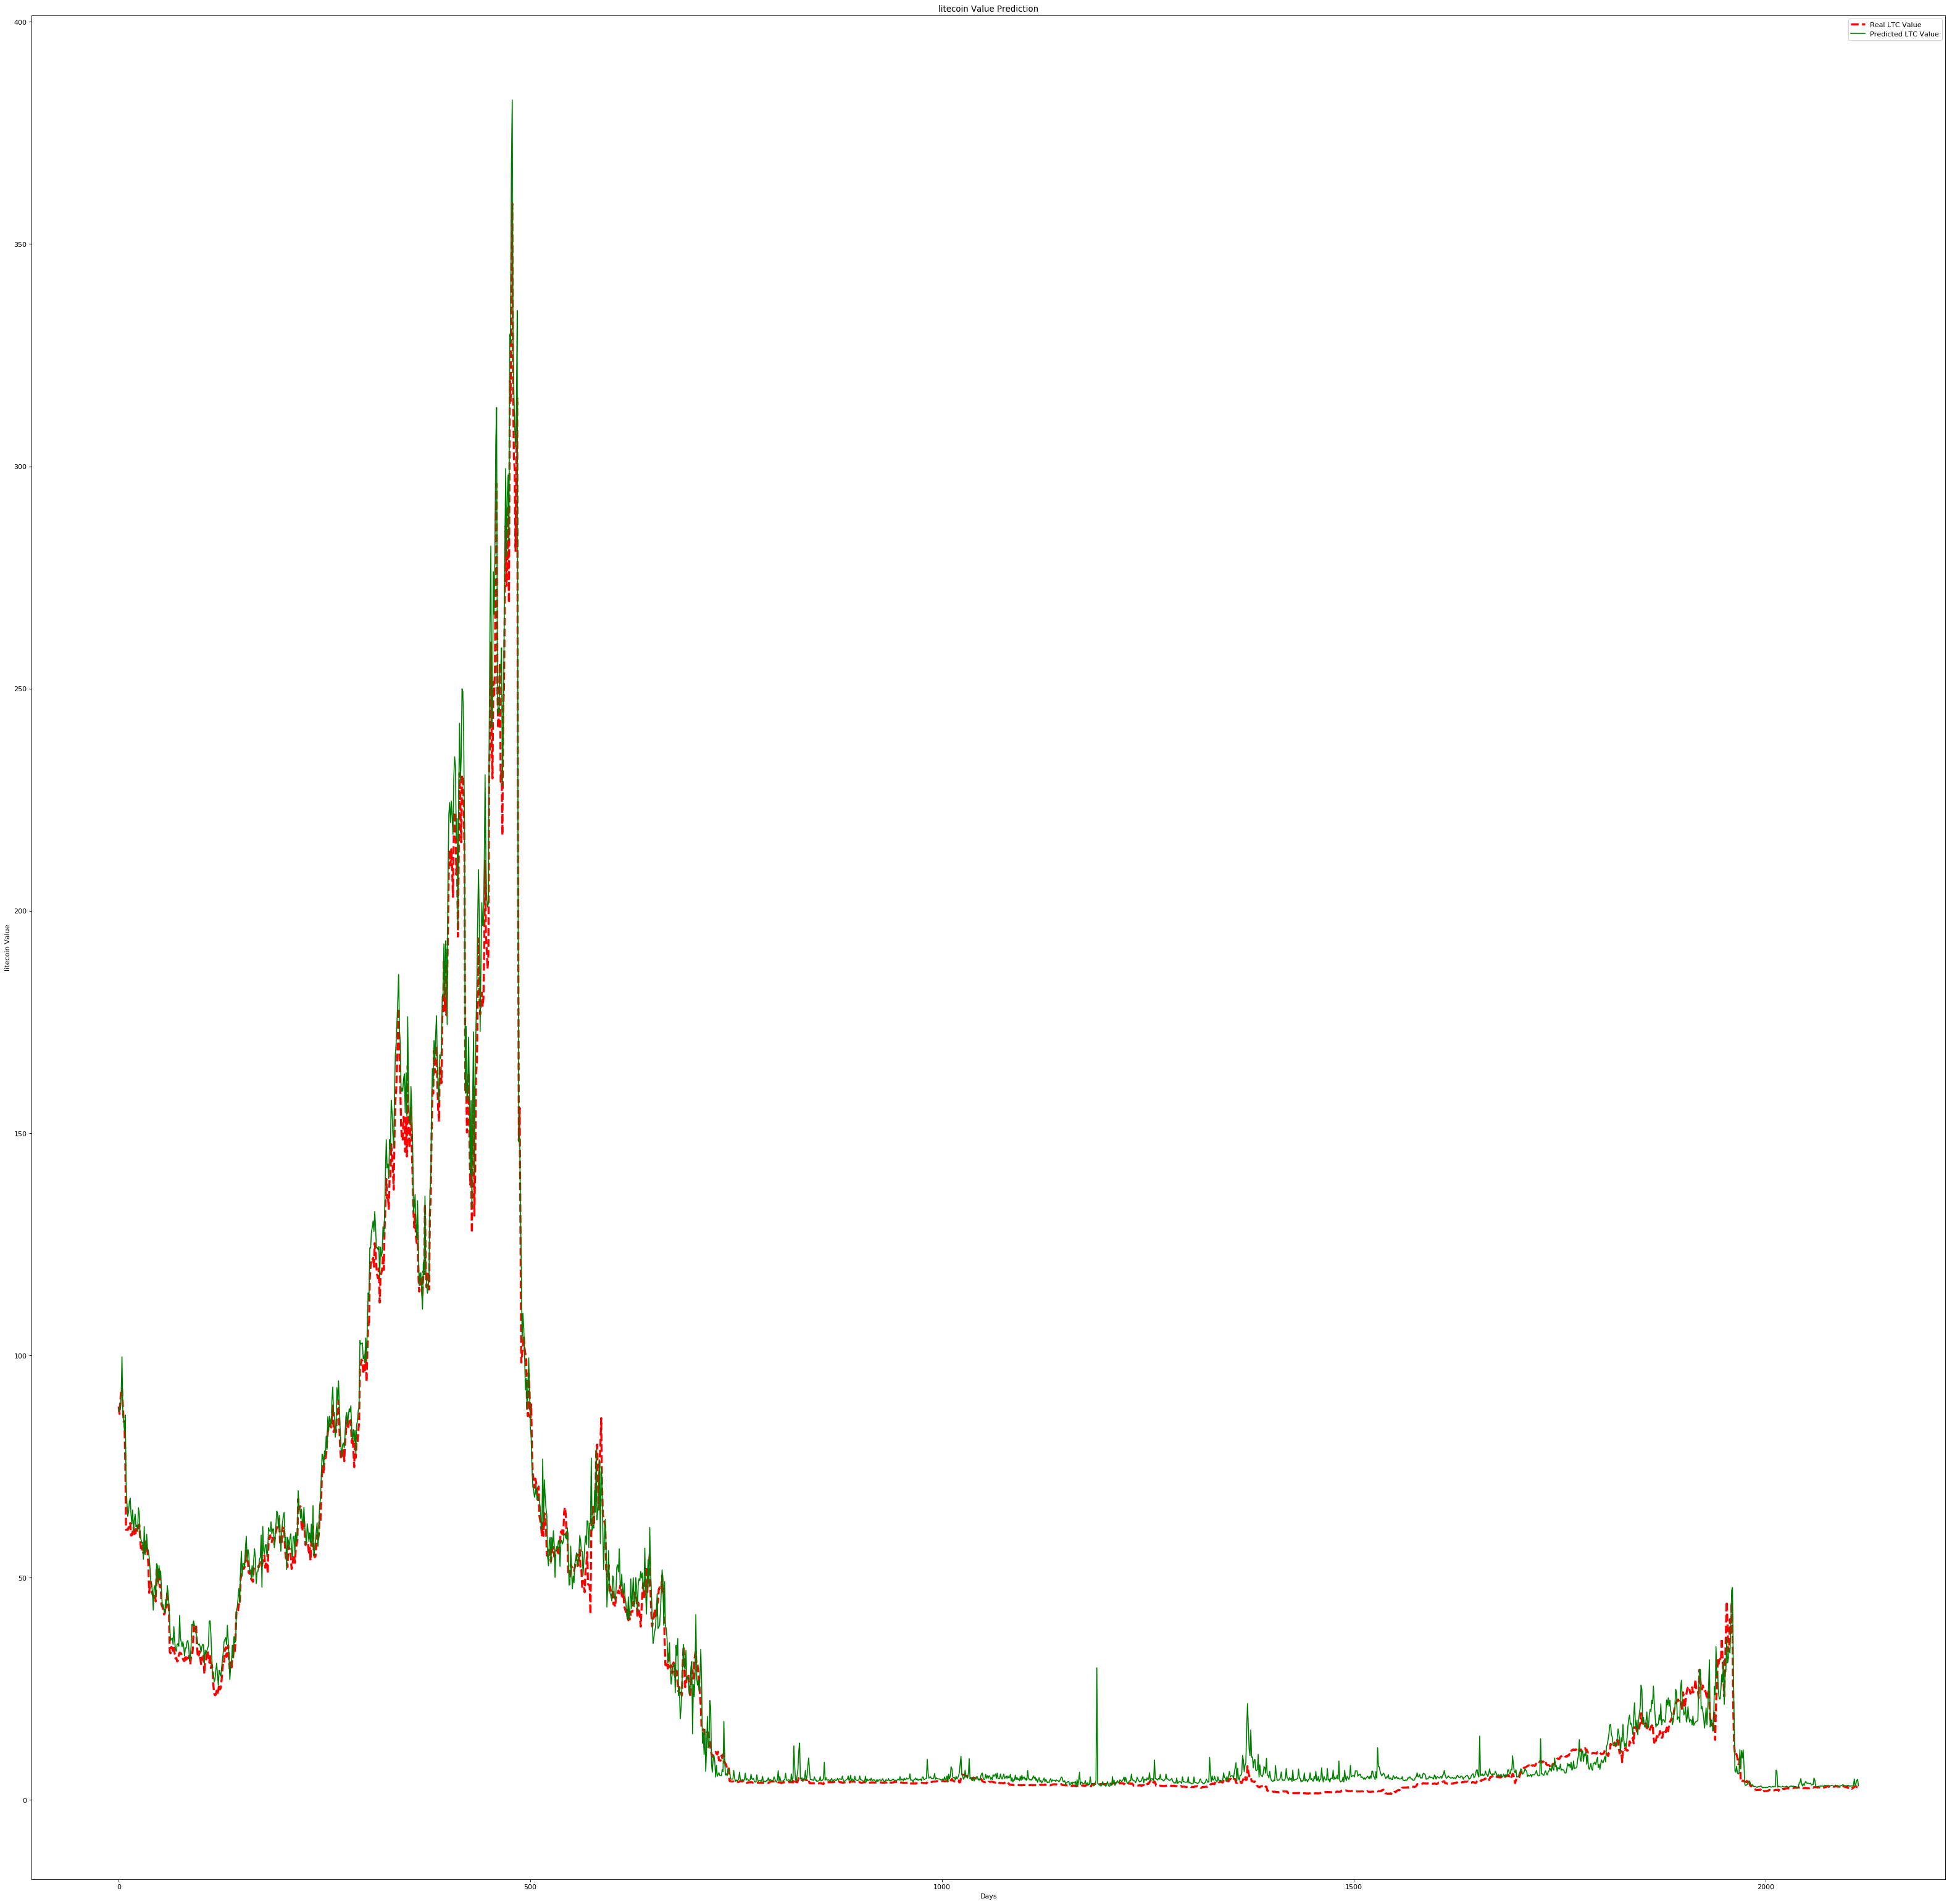

In [68]:
plt.figure(figsize=(50,50),dpi=80)
plt.plot(X_train_4_graph, color = 'red', label = 'Real LTC Value',linewidth=3, linestyle="--")
plt.plot(All_inverseRulu_T, color = 'green', label = 'Predicted LTC Value')
plt.title('litecoin Value Prediction' )
plt.xlabel('Days')
plt.ylabel('litecoin Value')
plt.legend()
plt.show()

In [69]:
#score $7.50 difference
from sklearn.metrics import mean_squared_error
mean_squared_error(X_train_4_graph,all_pred)

7.492208642235717

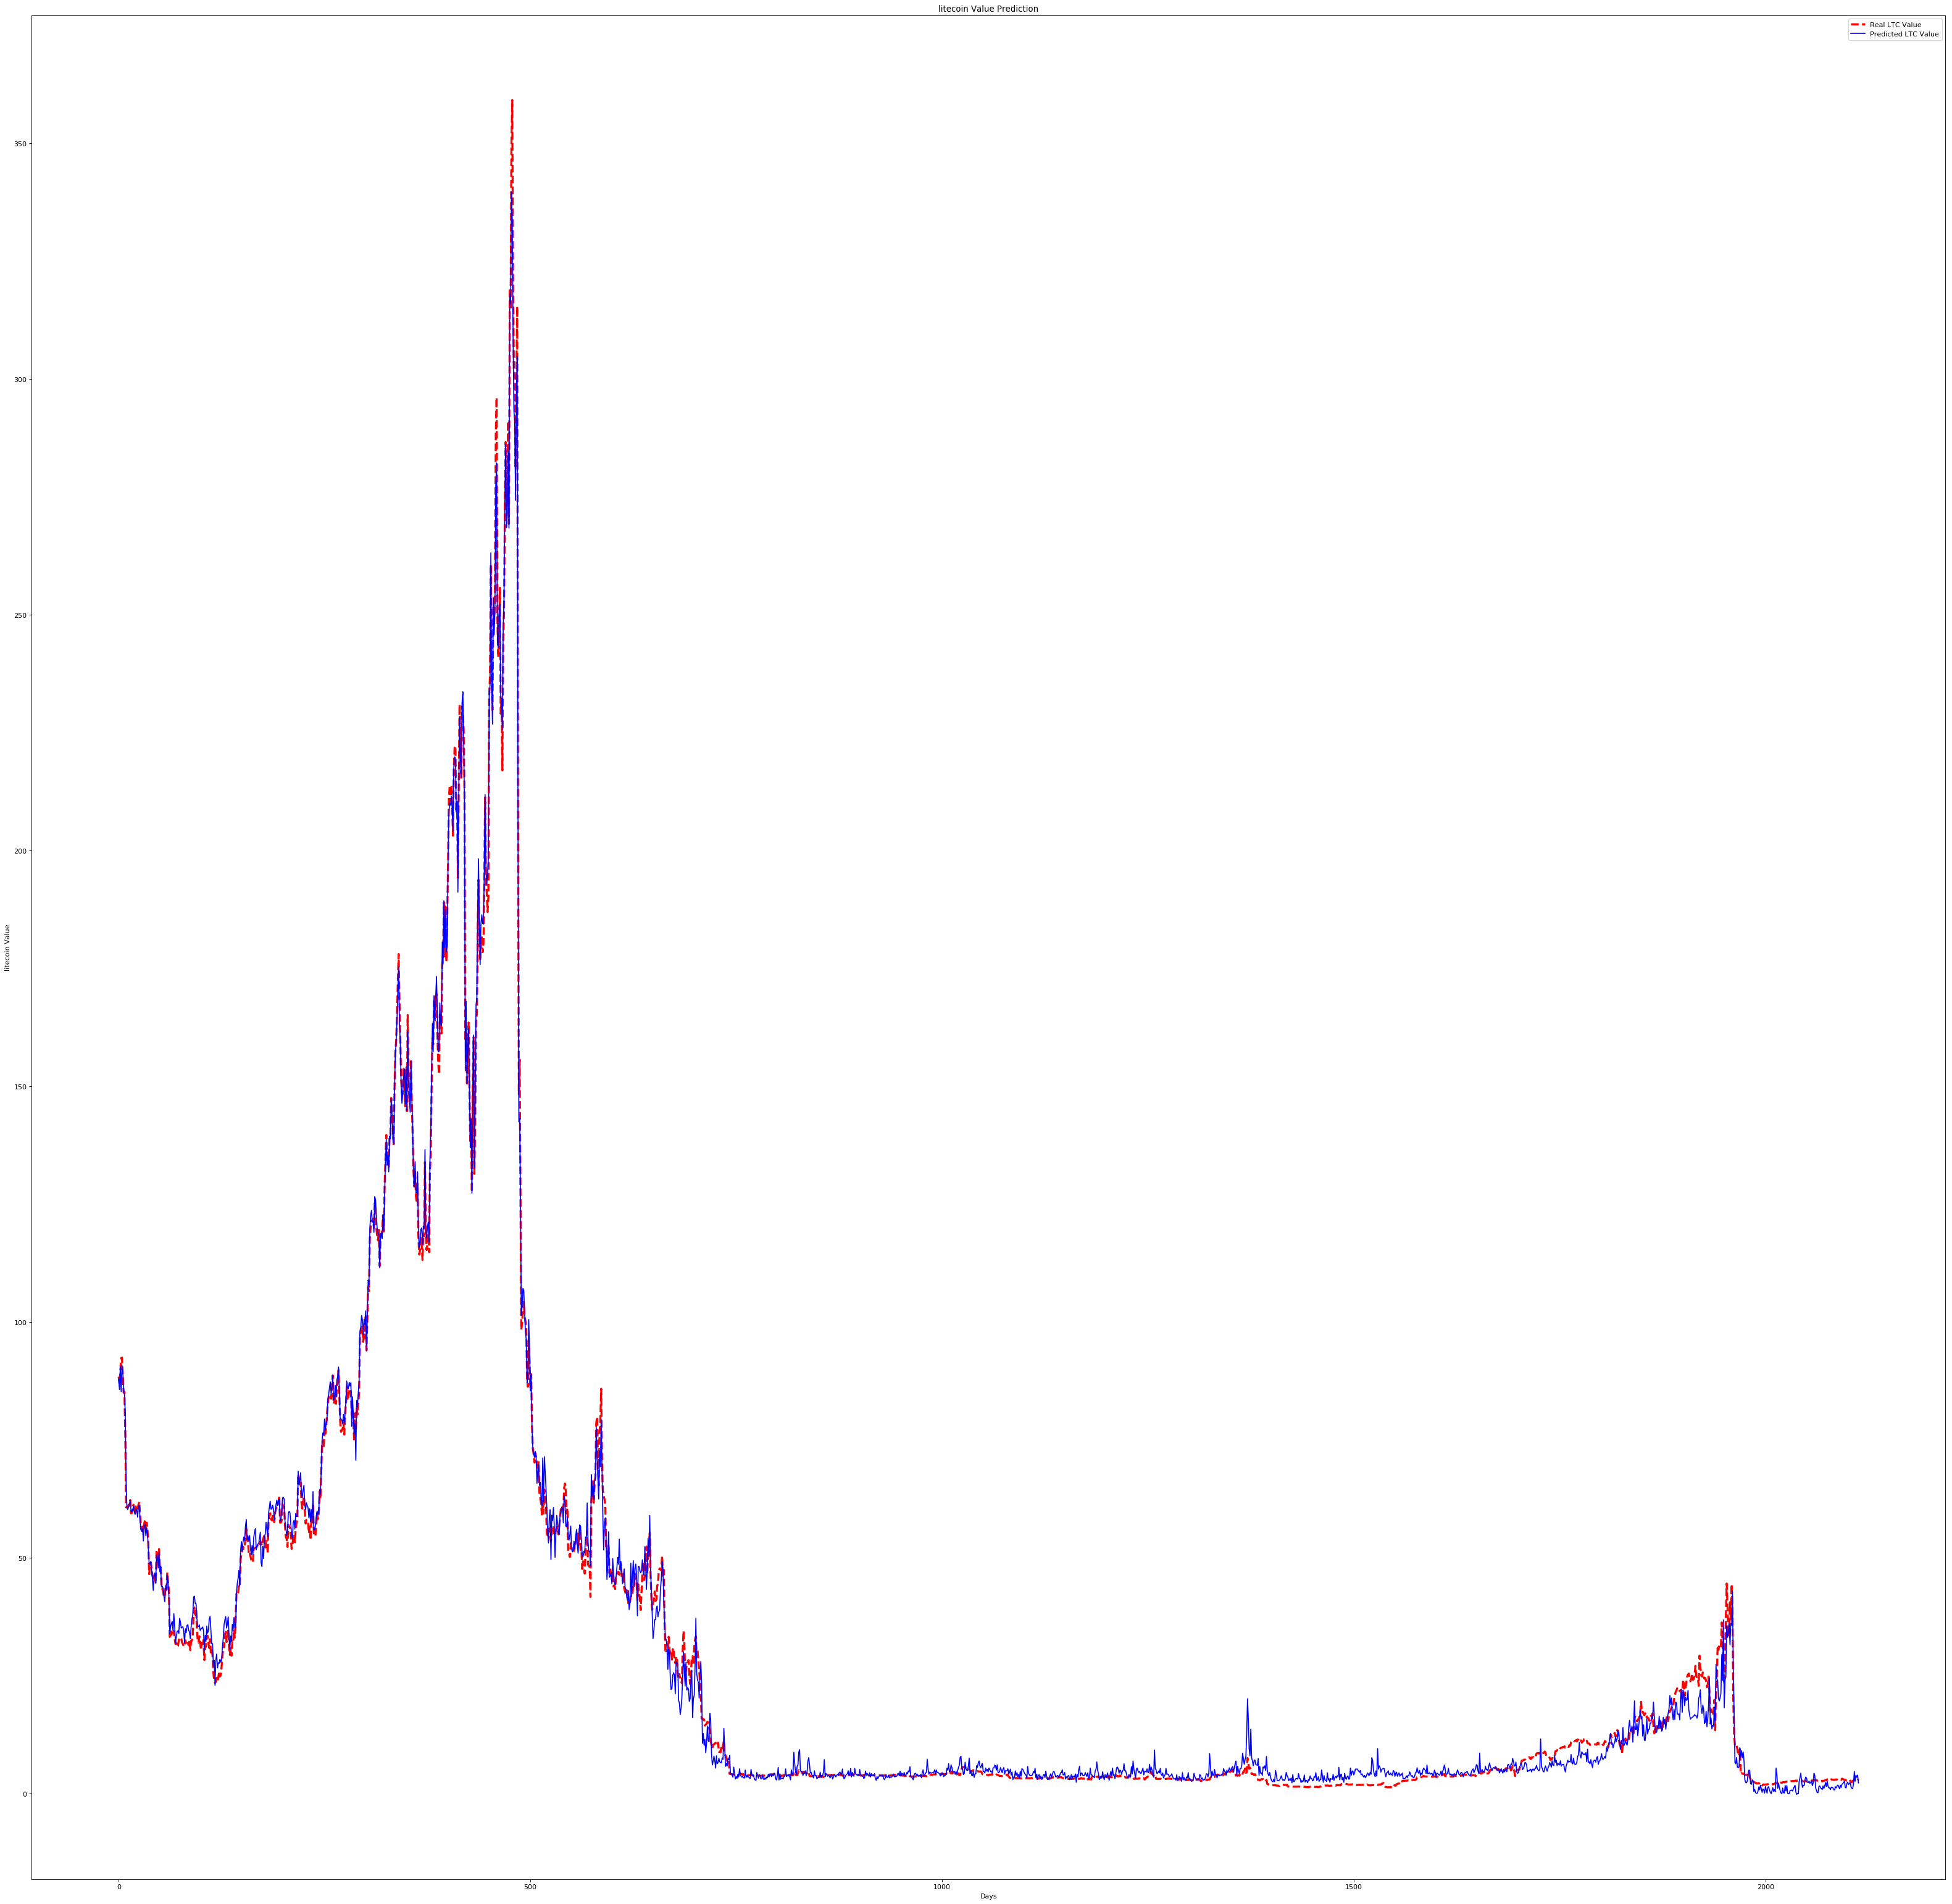

In [70]:
plt.figure(figsize=(50,50),dpi=80)
plt.plot(X_train_4_graph, color = 'red', label = 'Real LTC Value',linewidth=3, linestyle="--")
plt.plot(all_pred, color = 'blue', label = 'Predicted LTC Value')
plt.title('litecoin Value Prediction' )
plt.xlabel('Days')
plt.ylabel('litecoin Value')
plt.legend()
plt.show()

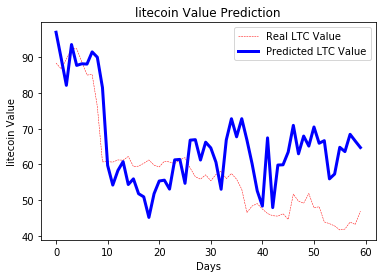

In [71]:
plt.plot(y_test_4_graph, color = 'red', label = 'Real LTC Value' ,linewidth=.5, linestyle="--")
plt.plot(inverse_T, color = 'blue', label = 'Predicted LTC Value', linewidth=3)
plt.title('litecoin Value Prediction')
plt.xlabel('Days')
plt.ylabel('litecoin Value')
plt.legend()
plt.show()

<a ><img src="https://i.imgflip.com/2z5n7o.jpg" title="made at imgflip.com"/></a>

# Source

https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class10_lstm.ipynb

https://www.youtube.com/watch?v=EqWm8A-dRYg

https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

https://adventuresinmachinelearning.com/keras-lstm-tutorial/